In [19]:
# import matplotlib.pyplot as plt
# %matplotlib inline
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               vertical_flip=True,
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [22]:
image_gen.flow_from_directory('dataset/dataset/train')

Found 14532 images belonging to 10 classes.


In [23]:
image_gen.flow_from_directory('dataset/dataset/test')

Found 3628 images belonging to 10 classes.


In [24]:
image_shape = (100,100,3)

In [25]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 64)         

In [28]:
train_image_gen = image_gen.flow_from_directory('dataset/dataset/train',
                                               target_size=image_shape[:2])

Found 14532 images belonging to 10 classes.


In [29]:
train_image_gen.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [30]:
test_image_gen = image_gen.flow_from_directory('dataset/dataset/test',
                                               target_size=image_shape[:2])

Found 3628 images belonging to 10 classes.


In [31]:
test_image_gen.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [32]:
results = model.fit_generator(train_image_gen,validation_data=test_image_gen,epochs=13)

Epoch 1/13
455/455 [==============================] - 147s 323ms/step - loss: 1.5087 - accuracy: 0.4897 - val_loss: 1.0366 - val_accuracy: 0.6690
Epoch 2/13
455/455 [==============================] - 104s 229ms/step - loss: 0.9691 - accuracy: 0.6670 - val_loss: 0.7178 - val_accuracy: 0.7591
Epoch 3/13
455/455 [==============================] - 102s 225ms/step - loss: 0.7582 - accuracy: 0.7379 - val_loss: 0.9541 - val_accuracy: 0.6665
Epoch 4/13
455/455 [==============================] - 103s 226ms/step - loss: 0.6412 - accuracy: 0.7817 - val_loss: 0.7388 - val_accuracy: 0.7718
Epoch 5/13
455/455 [==============================] - 107s 234ms/step - loss: 0.5543 - accuracy: 0.8121 - val_loss: 0.4578 - val_accuracy: 0.8454
Epoch 6/13
455/455 [==============================] - 105s 231ms/step - loss: 0.5030 - accuracy: 0.8278 - val_loss: 0.4663 - val_accuracy: 0.8396
Epoch 7/13
455/455 [==============================] - 105s 230ms/step - loss: 0.4547 - accuracy: 0.8466 - val_loss: 0.3873 -

In [33]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


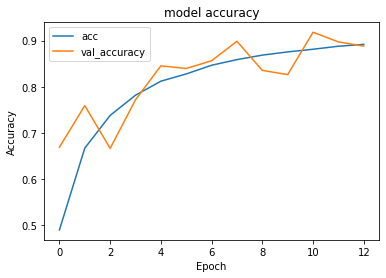

In [37]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc','val_accuracy'], loc='upper left')
plt.savefig('t1.png')
plt.show()


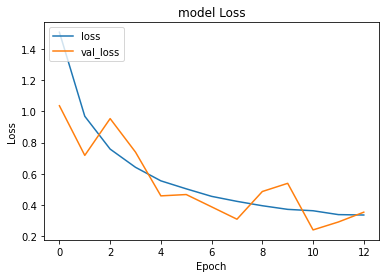

In [36]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.savefig('t2.png')
plt.show()

In [17]:
plt.savefig('training1fix.png')

<Figure size 432x288 with 0 Axes>

In [27]:
train_image_gen.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [39]:
model.save('model-train-7.h5')

In [2]:
new_model = tf.keras.models.load_model('model-train-5sv.h5')

In [49]:
import numpy as np
from keras.preprocessing import image

# foto = 'dataset/dataset/test/Tomato___Bacterial_spot/0a64655c-4052-4e5f-a696-2a6cf25d10c9___GCREC_Bact.Sp 6017.JPG'
foto = 'dataset/dataset/test/Tomato___healthy/0a0d6a11-ddd6-4dac-8469-d5f65af5afca___RS_HL 0555.JPG'
# foto = 'dataset/dataset/test/Tomato___Late_blight/0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG'
# foto = 'dataset/dataset/test/Tomato___Leaf_Mold/0a555f63-bf03-4958-8993-e1932b8dce9f___Crnl_L.Mold 9064.JPG'

foto = image.load_img(foto, target_size=(100,100))

foto = image.img_to_array(foto)

foto = np.expand_dims(foto, axis=0)
foto = foto/255

In [50]:
b=model.predict_classes(foto)
if b == 0:
    print('Bacterial_spot')
elif b == 1:
    print('Early_blight')
elif b == 2:
    print('Late_blight')
elif b == 3:
    print('Leaf_Mold')
elif b == 4:
    print('Septoria_leaf_spot')
elif b == 5:
    print('Spider_mites Two-spotted_spider_mite')
elif b == 6:
    print('Target_Spot')
elif b == 7:
    print('Tomato_Yellow_Leaf_Curl_Virus')
elif b == 8:
    print('Tomato_mosaic_virus')
else:
    print('healthy')


healthy
